## MATH 5260 HW4

### Xingyu Lan xl3163

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
ticket=["^DJI","AAPL", "HD", "JNJ", "JPM", "MSFT", "UNH", "V", "XOM"]

### Question 1

#### a)

In [2]:
import pandas_datareader as pdr
import datetime as dt

start_X = dt.datetime(2019, 1, 2)
end_X = dt.datetime(2020, 12, 31)
data_price = pdr.get_data_yahoo(ticket, start_X, end_X)
print(data_price)
df= data_price['Adj Close']
print(df)
'''
df = yf.download(ticket, start="2019-01-02", end="2020-12-31",group_by="ticker") 
print(df)
'''

Attributes     Adj Close                                                  \
Symbols             ^DJI        AAPL          HD         JNJ         JPM   
Date                                                                       
2019-01-02  23346.240234   38.277527  159.651337  117.233185   89.448891   
2019-01-03  22686.220703   34.464798  156.132538  115.370300   88.177666   
2019-01-04  23433.160156   35.936077  160.771790  117.306602   91.428360   
2019-01-07  23531.349609   35.856087  163.938660  116.554108   91.491943   
2019-01-08  23787.449219   36.539616  164.725800  119.261261   91.319412   
...                  ...         ...         ...         ...         ...   
2020-12-24  30199.869141  130.994522  263.784180  147.773361  119.857422   
2020-12-28  30403.970703  135.679642  262.158203  148.471191  120.646713   
2020-12-29  30335.669922  133.873077  259.178833  149.391937  120.329071   
2020-12-30  30409.560547  132.731598  258.273285  151.243088  120.665970   
2020-12-31  

'\ndf = yf.download(ticket, start="2019-01-02", end="2020-12-31",group_by="ticker") \nprint(df)\n'

#### b)

In [3]:
df.isnull().sum()

Symbols
^DJI    0
AAPL    0
HD      0
JNJ     0
JPM     0
MSFT    0
UNH     0
V       0
XOM     0
dtype: int64

In [4]:
df.ffill(inplace=True)
y=np.log(df['^DJI'])-np.log(df['^DJI'].shift(periods=1))
y=y.to_frame()
print(y)
y=np.sign(y)
y = y.iloc[2:,:]
y = y.replace(0, -1)
y.head(6)
'''
y.loc[y['Adj Close'] >0, 'Adj Close'] = 1
y.loc[y['Adj Close'] <=0, 'Adj Close'] = -1
print(y)
'''
print(y)
'''
y=[]
for i in temp:
    if i>0:
        y.append(1)
    else:
        y.append(-1)
y=y.toframe()

x=df["AAPL"]['Adj Close'].to_frame()
for i in ["HD","JNJ","JPM","MSFT","UNH","V","XOM"]:
    x=x.merge(df[str(i)]['Adj Close'],left_index=True,right_index=True,suffixes=('', str(i)))
y_train= y.iloc[:int(len(y)*0.8),:]
y_test = y.iloc[int(len(y)*0.8):,:]
x_train= x.iloc[1:int(len(y)*0.8+1),:]
x_test=  x.iloc[int(len(y)*0.8+1):,:]

print(x_train)
print(x_test)
'''

                ^DJI
Date                
2019-01-02       NaN
2019-01-03 -0.028678
2019-01-04  0.032394
2019-01-07  0.004181
2019-01-08  0.010825
...              ...
2020-12-24  0.002322
2020-12-28  0.006736
2020-12-29 -0.002249
2020-12-30  0.002433
2020-12-31  0.006455

[505 rows x 1 columns]
            ^DJI
Date            
2019-01-04   1.0
2019-01-07   1.0
2019-01-08   1.0
2019-01-09   1.0
2019-01-10   1.0
...          ...
2020-12-24   1.0
2020-12-28   1.0
2020-12-29  -1.0
2020-12-30   1.0
2020-12-31   1.0

[503 rows x 1 columns]


/Users/lanjenny/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


'\ny=[]\nfor i in temp:\n    if i>0:\n        y.append(1)\n    else:\n        y.append(-1)\ny=y.toframe()\n\nx=df["AAPL"][\'Adj Close\'].to_frame()\nfor i in ["HD","JNJ","JPM","MSFT","UNH","V","XOM"]:\n    x=x.merge(df[str(i)][\'Adj Close\'],left_index=True,right_index=True,suffixes=(\'\', str(i)))\ny_train= y.iloc[:int(len(y)*0.8),:]\ny_test = y.iloc[int(len(y)*0.8):,:]\nx_train= x.iloc[1:int(len(y)*0.8+1),:]\nx_test=  x.iloc[int(len(y)*0.8+1):,:]\n\nprint(x_train)\nprint(x_test)\n'

In [5]:


x=df["AAPL"].to_frame()
for i in ["HD","JNJ","JPM","MSFT","UNH","V","XOM"]:
    x=x.merge(df[str(i)],left_index=True,right_index=True,suffixes=('', str(i)))
x = np.log(x) - np.log(x.shift(1))
xd=x
x = x.iloc[1:-1,:]

print(x)
'''
y_train= y.iloc[3:int((len(x.index)-3)*0.8)+3].to_numpy()
y_test = y.iloc[int((len(x.index)-3)*0.8)+3:].to_numpy()
x_train= x.iloc[2:int((len(x.index)-3)*0.8+2),:].to_numpy()
x_test=  x.iloc[int((len(x.index)-3)*0.8+2):,:][:-1].to_numpy()

print(y_train)
print(y_test)
print(x_train)
print(x_test)
'''

                AAPL        HD       JNJ       JPM      MSFT       UNH  \
Date                                                                     
2019-01-03 -0.104925 -0.022287 -0.016018 -0.014314 -0.037482 -0.027649   
2019-01-04  0.041803  0.029281  0.016644  0.036202  0.045460  0.011627   
2019-01-07 -0.002228  0.019506 -0.006435  0.000695  0.001275  0.001918   
2019-01-08  0.018884  0.004790  0.022961 -0.001888  0.007224  0.013282   
2019-01-09  0.016839  0.010290 -0.007957 -0.001692  0.014198  0.001438   
...              ...       ...       ...       ...       ...       ...   
2020-12-23 -0.007001 -0.000852 -0.005120  0.027561 -0.013125  0.007672   
2020-12-24  0.007683  0.004106  0.003482 -0.004407  0.007797  0.009434   
2020-12-28  0.035141 -0.006183  0.004711  0.006564  0.009873  0.015028   
2020-12-29 -0.013404 -0.011430  0.006182 -0.002636 -0.003607  0.004039   
2020-12-30 -0.008563 -0.003500  0.012315  0.002796 -0.011081 -0.006818   

                   V       XOM  
Date

'\ny_train= y.iloc[3:int((len(x.index)-3)*0.8)+3].to_numpy()\ny_test = y.iloc[int((len(x.index)-3)*0.8)+3:].to_numpy()\nx_train= x.iloc[2:int((len(x.index)-3)*0.8+2),:].to_numpy()\nx_test=  x.iloc[int((len(x.index)-3)*0.8+2):,:][:-1].to_numpy()\n\nprint(y_train)\nprint(y_test)\nprint(x_train)\nprint(x_test)\n'

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
x_data = x.to_numpy()
y_data = y.to_numpy()
y_data = y_data.flatten()
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, shuffle = False)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train) # prepare the necessary info eg. stdev of each feature
x_train = scaler.transform(x_train) # convert feature value to Z-score
x_test = scaler.transform(x_test)

print(x_train)
print(x_test)

[[-4.55402577 -1.02401968 -1.01687141 ... -1.09794846 -1.73543979
  -0.59004138]
 [ 1.65545836  1.22351165  0.99866025 ...  0.423413    1.89311479
   1.51175078]
 [-0.20795086  0.79751084 -0.42554338 ...  0.04732136  0.77496839
   0.25018516]
 ...
 [ 0.16803189  0.22318744 -0.08288843 ...  0.08640656  0.33722511
   1.19697217]
 [ 0.03946903 -0.11615806  0.46421351 ...  0.97384683  0.85539039
   0.39321495]
 [ 1.33768887  0.25421742 -0.38288628 ...  0.16963294  0.5749594
  -0.15599996]]
[[-1.08692344e+00  3.13090485e-01  4.09161979e-01  8.18292243e-01
  -9.04121264e-01  3.37621195e-01 -6.08276410e-01 -1.47577598e-01]
 [ 4.97034487e-01  4.40320442e-01 -2.65597129e-01  4.72166720e-01
  -9.97225915e-01  2.25118136e-01  5.34934189e-02  1.02886890e+00]
 [-1.39132534e+00 -2.25194268e-02 -4.71885049e-01  1.17083991e+00
  -1.15797605e+00 -4.60315656e-01  1.81365579e-01  4.57395623e-01]
 [ 1.26995630e+00  9.90580440e-01  1.09082493e+00 -3.24695836e-01
   1.18598558e+00  7.89276902e-01  1.7793353

#### c)

In [8]:
from sklearn import svm
#model = svm.SVR(C=1.0, kernel='rbf', gamma=1.0)
model = svm.SVC(C=1.0, kernel='rbf', gamma=1.0)
model.fit(x_train, y_train)

y_predict = model.predict(x_test)

print(y_predict)
y_predict = np.sign(y_predict)
print(y_predict)
y_predict = np.where(y_predict == 0, -1, y_predict)
np.mean(y_predict == y_test)



[ 1.  1.  1. -1. -1. -1.  1. -1.  1.  1.  1. -1.  1. -1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1.
  1. -1.  1.  1. -1.  1. -1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1.  1.
  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.
  1. -1.  1.  1.  1. -1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1. -1.  1.
 -1.  1.  1.  1.  1. -1.  1.  1. -1.  1. -1.]
[ 1.  1.  1. -1. -1. -1.  1. -1.  1.  1.  1. -1.  1. -1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1.
  1. -1.  1.  1. -1.  1. -1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1.  1.
  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.
  1. -1.  1.  1.  1. -1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1. -1.  1.
 -1.  1.  1.  1.  1. -1.  1.  1. -1.  1. -1.]


0.594059405940594

In [9]:
model.score(x_test,y_test)

0.594059405940594

#### d)

In [10]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, x_train, y_train, cv=5)
cv_scores.mean()

0.5618827160493828

#### e)

In [11]:
from sklearn.model_selection import GridSearchCV
parm_grid = [
    {'C': [0.1,1.0,10,100], 'gamma':[0.1,0.2,0.3,0.4,0.5,1,5,10]}
]
grid_search = GridSearchCV(model, parm_grid, cv=5)
grid_search.fit(x_train, y_train) # do the real job
best_model = grid_search.best_estimator_ 
print(grid_search.best_params_)


{'C': 100, 'gamma': 0.2}


#### f)

In [12]:

model = svm.SVC(C=100, kernel='rbf', gamma=0.2)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print(y_predict)
model.score(x_test,y_test)

[ 1.  1.  1. -1. -1. -1.  1. -1.  1.  1.  1. -1.  1. -1. -1.  1. -1.  1.
 -1.  1.  1. -1. -1.  1. -1.  1.  1.  1.  1.  1.  1. -1.  1. -1. -1.  1.
 -1. -1.  1. -1. -1.  1. -1.  1.  1.  1.  1. -1.  1. -1.  1. -1.  1.  1.
  1. -1. -1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.
 -1. -1.  1.  1. -1. -1.  1. -1.  1.  1. -1.  1.  1.  1. -1.  1. -1. -1.
 -1.  1. -1.  1. -1. -1.  1.  1. -1.  1.  1.]


0.6138613861386139

In [13]:
simu_X = xd.loc['2020-09-30':'2020-12-30']
simu_X

,AAPL,HD,JNJ,JPM,MSFT,UNH,V,XOM
Date,,,,,,,,
2020-09-30,0.014963,0.020371,0.012300,0.009603,0.014704,0.024745,0.002654,0.001457
2020-10-01,0.008427,-0.000324,-0.010533,0.007245,0.010076,0.004161,0.016761,-0.035580
2020-10-02,-0.032813,0.006069,-0.007358,0.009443,-0.029956,-0.003488,-0.009338,-0.004538
2020-10-05,0.030326,0.009940,0.013516,0.020916,0.020117,0.019584,0.010272,0.022783
2020-10-06,-0.029088,-0.020159,-0.013379,-0.010352,-0.021476,-0.011698,-0.015298,-0.010428
...,...,...,...,...,...,...,...,...
2020-12-23,-0.007001,-0.000852,-0.005120,0.027561,-0.013125,0.007672,-0.002627,0.012770
2020-12-24,0.007683,0.004106,0.003482,-0.004407,0.007797,0.009434,0.016425,-0.004078
2020-12-28,0.035141,-0.006183,0.004711,0.006564,0.009873,0.015028,0.018656,0.003360


In [14]:
simu_x = np.array(simu_X)
simu_x = scaler.transform(simu_x)
simu_Y = model.predict(simu_x)
simu_Y

array([-1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,
        1., -1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,
       -1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1.,
       -1., -1.,  1., -1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1.])

In [15]:
action1 = simu_Y*0.5+0.5
action1 = action1.astype(int)
action1=action1


In [16]:

ticker_Y = ["^DJI"]


start_Y = dt.datetime(2019, 1, 3)  
end_Y = dt.datetime(2021, 1, 4)
y = pdr.get_data_yahoo(ticker_Y, start_Y, end_Y)
y = y['Adj Close']
print(y)

port = y.loc['2020-09-30':'2020-12-31']
print(port)

port['log_ret'] = np.log(port['^DJI']) - np.log(port['^DJI'].shift(1))
port = port.iloc[1:,:]

#compute the value of strategy1 portfolio
port['action1'] = action1
port['return1'] = port['action1']*port['log_ret']
port['strategy1'] = 10000*np.exp(port['return1'].cumsum())

port



Symbols             ^DJI
Date                    
2019-01-03  22686.220703
2019-01-04  23433.160156
2019-01-07  23531.349609
2019-01-08  23787.449219
2019-01-09  23879.119141
...                  ...
2020-12-28  30403.970703
2020-12-29  30335.669922
2020-12-30  30409.560547
2020-12-31  30606.480469
2021-01-04  30223.890625

[505 rows x 1 columns]
Symbols             ^DJI
Date                    
2020-09-30  27781.699219
2020-10-01  27816.900391
2020-10-02  27682.810547
2020-10-05  28148.640625
2020-10-06  27772.759766
...                  ...
2020-12-24  30199.869141
2020-12-28  30403.970703
2020-12-29  30335.669922
2020-12-30  30409.560547
2020-12-31  30606.480469

[65 rows x 1 columns]


/var/folders/_v/7gcs9p151qn1r6xp96850m8c0000gn/T/ipykernel_4267/2118183761.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port['log_ret'] = np.log(port['^DJI']) - np.log(port['^DJI'].shift(1))


Symbols,^DJI,log_ret,action1,return1,strategy1
Date,,,,,
2020-10-01,27816.900391,0.001266,0,0.000000,10000.000000
2020-10-02,27682.810547,-0.004832,1,-0.004832,9951.795548
2020-10-05,28148.640625,0.016687,0,0.000000,9951.795548
2020-10-06,27772.759766,-0.013443,0,-0.000000,9951.795548
2020-10-07,28303.460938,0.018928,1,0.018928,10141.961365
...,...,...,...,...,...
2020-12-24,30199.869141,0.002322,1,0.002322,11673.844984
2020-12-28,30403.970703,0.006736,1,0.006736,11752.741021
2020-12-29,30335.669922,-0.002249,0,-0.000000,11752.741021


In [17]:
port['strategy1'][-1]



11857.659298596212

#### g)

In [18]:
#compute the value of simplest strategy portfolio
port['action2'] = 1
port['return2'] = port['action2']*port['log_ret']
port['strategy2'] = 10000*np.exp(port['return2'].cumsum())
port

Symbols,^DJI,log_ret,action1,return1,strategy1,action2,return2,strategy2
Date,,,,,,,,
2020-10-01,27816.900391,0.001266,0,0.000000,10000.000000,1,0.001266,10012.670633
2020-10-02,27682.810547,-0.004832,1,-0.004832,9951.795548,1,-0.004832,9964.405103
2020-10-05,28148.640625,0.016687,0,0.000000,9951.795548,1,0.016687,10132.080260
2020-10-06,27772.759766,-0.013443,0,-0.000000,9951.795548,1,-0.013443,9996.782251
2020-10-07,28303.460938,0.018928,1,0.018928,10141.961365,1,0.018928,10187.807706
...,...,...,...,...,...,...,...,...
2020-12-24,30199.869141,0.002322,1,0.002322,11673.844984,1,0.002322,10870.418293
2020-12-28,30403.970703,0.006736,1,0.006736,11752.741021,1,0.006736,10943.884484
2020-12-29,30335.669922,-0.002249,0,-0.000000,11752.741021,1,-0.002249,10919.299674


In [19]:
port['strategy2'][-1]

11016.777709584276

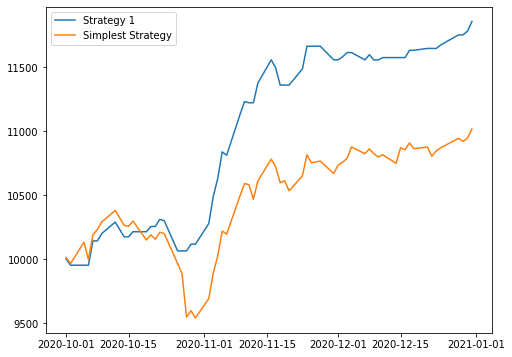

In [20]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6))
plt.plot(port.index, port['strategy1'], label = "Strategy 1")
plt.plot(port.index, port['strategy2'], label = "Simplest Strategy")
plt.legend()
plt.show()



The simplest buy-and-hold strategy have higher return than the simplest non-action return by the graph shown above, the blue line is higher than the orange line and perform better. 